<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Nittala Venkata Sai Aditya

EID: vn5227

Name: Soumith Reddy Palreddy

EID: sp52466

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

#### Answer:

Firstly, Catboost and XGBoost differ in terms of how the trees are built. Catboost trees are built in a symmetric fashion which isn't the case in XGBoost. In every step, leaves from the previous tree are split using the same condition. The feature-split pair that accounts for the lowest loss is selected and used for all the level’s nodes. This balanced tree architecture aids in efficient CPU implementation, decreases prediction time, makes swift model appliers, and controls overfitting as the structure serves as regularization. 

Secondly, Catboost follows ordered boosting while XGBoost uses the classic boosting which are more prone to overfitting on small/noisy datasets due to the problem known as prediction shift. When calculating the gradient estimate of a data instance, these algorithms use the same data instances that the model was built with, thus having no chances of experiencing unseen data. CatBoost, on the other hand, uses the concept of ordered boosting, a permutation-driven approach to train model on a subset of data while calculating residuals on another subset, thus preventing target leakage and overfitting.  

Thirdly, the way the catogorical variables are treated in both of these algorithm is different. CatBoost offers to different ways of encoding the categorical data - it doesn't work well if these catogorical variables aren't encoded but not better than XGBoost. CatBoost performs the best when the dataset is appropriately encoded both in terms of accuracy and time.

In Conculsion, XGBoost in general is good for any kind of datasets whereas CatBoost works extremely well for catogorical data. CatBoost is generally faster than XGBoost owing to CatBoosts symmetric tree construction mechanism. Also, CatBoost is less prone to overfitting than XGBoost owing to the ordered boosting mechanism.


# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [1]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [2]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In [4]:
#Highly Imbalanced data
y.value_counts()

0    4645
1     355
Name: SeriousDlqin2yrs, dtype: int64

In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
columns_list = list(X.columns)

In [7]:
# Part a)

# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=14)
dt.fit(X_train, y_train)
y_pred_acc_dt = dt.predict(X_test)
y_pred_roc_dt = dt.predict_proba(X_test)[:,1]

#Print Accuracy and ROC-AUC scores
accuracy_score_dt = accuracy_score(y_test, y_pred_acc_dt)
roc_score_dt  = roc_auc_score(y_test, y_pred_roc_dt)

print("Decision Tree Accuracy Score : ",accuracy_score_dt)
print("Decision Tree ROC - AUC score : ", roc_score_dt)

data = [['Decision Tree Classifier' , accuracy_score_dt, roc_score_dt]]
df = pd.DataFrame(data, columns=['Algorithm' , 'Accuracy Score', 'ROC Score'])



Decision Tree Accuracy Score :  0.888
Decision Tree ROC - AUC score :  0.5854582176218127


In [8]:
# Part b

from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), n_estimators=25, random_state=14)

bag_model.fit(X_train, y_train)
y_pred_acc_bag_model = bag_model.predict(X_test)
y_pred_roc_bag_model = bag_model.predict_proba(X_test)[:,1]

#Print Accuracy and ROC-AUC scores
accuracy_score_bag_model = accuracy_score(y_test, y_pred_acc_bag_model)
roc_score_bag_model  = roc_auc_score(y_test, y_pred_roc_bag_model)

print("Bagging Model Accuracy Score : ",accuracy_score_bag_model)
print("Bagging Model ROC - AUC score : ", roc_score_bag_model)

df = df.append({'Algorithm':'Bagging Classifier', 'Accuracy Score':accuracy_score_bag_model, 'ROC Score':roc_score_bag_model}, ignore_index=True)


Bagging Model Accuracy Score :  0.9256
Bagging Model ROC - AUC score :  0.7857106791214341


In [9]:
# Part c)
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
from sklearn.model_selection import GridSearchCV
rf = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5)
rf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

#Predicting on test dataset
y_pred_acc_rf = rf.predict(X_test)
y_pred_roc_rf = rf.predict_proba(X_test)[:,1]

#Print Accuracy and ROC-AUC scores
accuracy_score_rf = accuracy_score(y_test, y_pred_acc_rf)
roc_score_rf  = roc_auc_score(y_test, y_pred_roc_rf)

print("Random Forest Accuracy Score : ",accuracy_score_rf)
print("Random Forest ROC - AUC score : ", roc_score_rf)
print("Confustion Matrix for Random Forest \n{}".format(confusion_matrix(y_test, y_pred_acc_rf)))



print("Random Forest best parameters : ")
print(rf.best_params_)

df = df.append({'Algorithm':'Random Forest Classifier', 'Accuracy Score':accuracy_score_rf, 'ROC Score':roc_score_rf}, ignore_index=True)



Random Forest Accuracy Score :  0.932
Random Forest ROC - AUC score :  0.8375612219136582
Confustion Matrix for Random Forest 
[[1162    3]
 [  82    3]]
Random Forest best parameters : 
{'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}


In [10]:
# Part d)

clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
from sklearn.model_selection import GridSearchCV
ab = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5)
ab.fit(X_train, y_train) # X is train samples and y is the corresponding labels


#Predicting on test dataset
y_pred_acc_ab = ab.predict(X_test)
y_pred_roc_ab = ab.predict_proba(X_test)[:,1]

#Print Accuracy and ROC-AUC scores
accuracy_score_ab = accuracy_score(y_test, y_pred_acc_ab)
roc_score_ab  = roc_auc_score(y_test, y_pred_roc_ab)

print("Adaboost Accuracy Score : ",accuracy_score_ab)
print("Adaboost ROC - AUC score : ", roc_score_ab)
print("Confustion Matrix for Adaboost \n{}".format(confusion_matrix(y_test, y_pred_acc_ab)))



print("Adaboost best parameters : ")
print(ab.best_params_)

df = df.append({'Algorithm':'Adaboost Classifier', 'Accuracy Score':accuracy_score_ab, 'ROC Score':roc_score_ab}, ignore_index=True)



Adaboost Accuracy Score :  0.9328
Adaboost ROC - AUC score :  0.8390254986114618
Confustion Matrix for Adaboost 
[[1153   12]
 [  72   13]]
Adaboost best parameters : 
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}


In [11]:
# Part e)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
from sklearn.model_selection import GridSearchCV
gb = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5)
gb.fit(X_train, y_train) # X is train samples and y is the corresponding labels


#Predicting on test dataset
y_pred_acc_gb = gb.predict(X_test)
y_pred_roc_gb = gb.predict_proba(X_test)[:,1]

#Print Accuracy and ROC-AUC scores
accuracy_score_gb = accuracy_score(y_test, y_pred_acc_gb)
roc_score_gb  = roc_auc_score(y_test, y_pred_roc_gb)

print("Gradient Boosting Accuracy Score : ",accuracy_score_gb)
print("Gradient Boosting ROC - AUC score : ", roc_score_gb)
print("Confustion Matrix for Gradient Boosting \n{}".format(confusion_matrix(y_test, y_pred_acc_gb)))



print("Gradient Boosting best parameters : ")
print(gb.best_params_)

df = df.append({'Algorithm':'Gradient Boosting Classifier', 'Accuracy Score':accuracy_score_gb, 'ROC Score':roc_score_gb}, ignore_index=True)




Gradient Boosting Accuracy Score :  0.932
Gradient Boosting ROC - AUC score :  0.8366372128250441
Confustion Matrix for Gradient Boosting 
[[1164    1]
 [  84    1]]
Gradient Boosting best parameters : 
{'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17}


In [12]:
# Part f)

df.sort_values(by='ROC Score')

,Algorithm,Accuracy Score,ROC Score
0,Decision Tree Classifier,0.8880,0.585458
1,Bagging Classifier,0.9256,0.785711
4,Gradient Boosting Classifier,0.9320,0.836637
2,Random Forest Classifier,0.9320,0.837561
3,Adaboost Classifier,0.9328,0.839025


* Adaboost Classifier has the maximum ROC score which is in line with the general expectation because adaboost classifiers tend to perform better for classification problems. 
* There is not much difference in the 2 boosting algorithms and Random Forest in terms of roc score which indicates we can use either of those 3 for our problems but due to the classification setting, Adaboost performs slightly better than the rest. Since GBM also runs the risk of overfitting it is slightly less accurate than Adaboost
* Bagging Classifier performs a bit poorer than the boosting algorithms and Random Forest. This can be attributed to the non random nature of the split for bagging which may not be able to handle the comlexities which arise in the test dataset
* Decision Tree has the worst roc score due to the basic nature of the classifier and it's inability to handle complex data as well as imbalanced data

**From a business standpoint** - False Negatives are important as the business is credit business and we should not lose out on any of the customers who are bound to default and aren't flagged by the algo. Hence, AdaBoost has the lowest False Negatives and contributes one more reason to be the best performer on this dataset

## Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost

%matplotlib inline

In [15]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.685 s
predict time 0.008 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.667 s
predict time 0.004 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.601 s
predict time 0.008 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



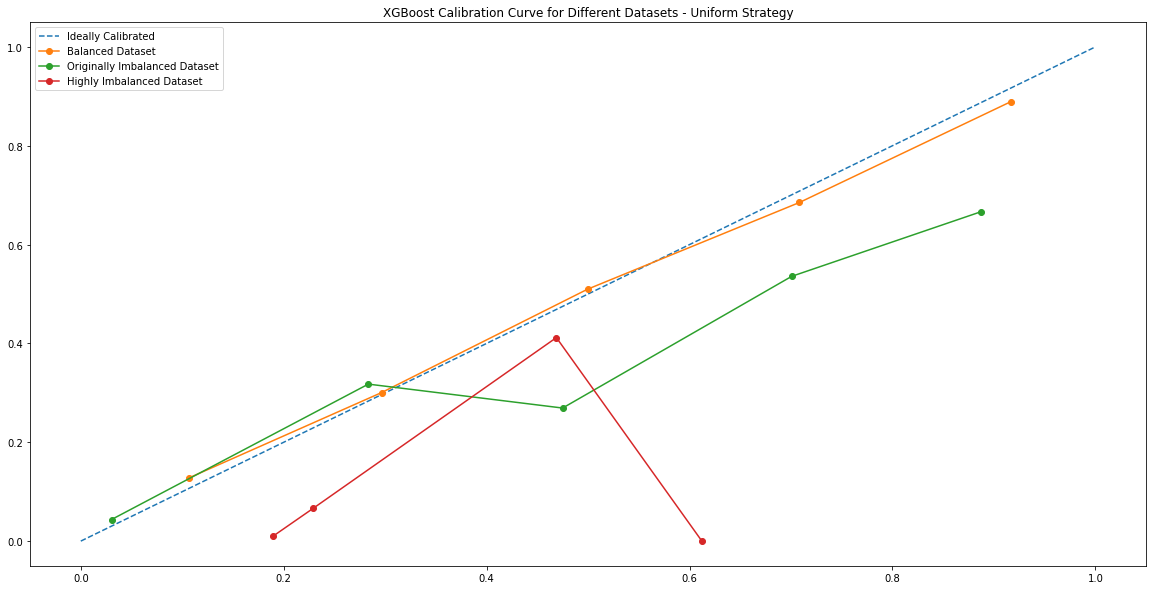

In [16]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)

prob_true1, prob_pred1 = calibration_curve(y_test1, y_pred_proba1,strategy='uniform')
prob_true2, prob_pred2 = calibration_curve(y_test2, y_pred_proba2,strategy='uniform')
prob_true3, prob_pred3 = calibration_curve(y_test3, y_pred_proba3,strategy='uniform')

plt.figure(figsize=(20,10))
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

plt.plot(prob_pred1,prob_true1,'o-',label='Balanced Dataset')
plt.plot(prob_pred2,prob_true2,'o-',label='Originally Imbalanced Dataset')
plt.plot(prob_pred3,prob_true3,'o-',label='Highly Imbalanced Dataset')
plt.title('XGBoost Calibration Curve for Different Datasets - Uniform Strategy')
plt.legend()
plt.show()

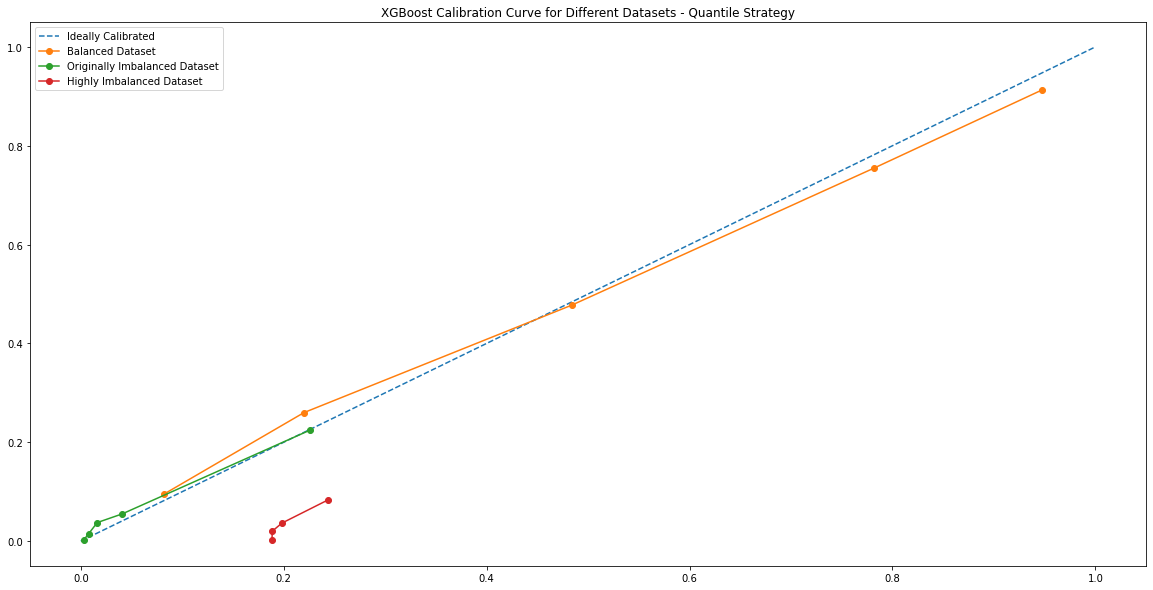

In [17]:
#Plot all calibration curves for strategy = 'quantile'

prob_true1, prob_pred1 = calibration_curve(y_test1, y_pred_proba1,strategy='quantile')
prob_true2, prob_pred2 = calibration_curve(y_test2, y_pred_proba2,strategy='quantile')
prob_true3, prob_pred3 = calibration_curve(y_test3, y_pred_proba3,strategy='quantile')

plt.figure(figsize=(20,10))
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

plt.plot(prob_pred1,prob_true1,'o-',label='Balanced Dataset')
plt.plot(prob_pred2,prob_true2,'o-',label='Originally Imbalanced Dataset')
plt.plot(prob_pred3,prob_true3,'o-',label='Highly Imbalanced Dataset')
plt.title('XGBoost Calibration Curve for Different Datasets - Quantile Strategy')
plt.legend()
plt.show()

* The balanced dataset is more calibrated than the rest because it is much closer to the ideal curve. Originally imbalanced dataset deviates from the ideal curve due to the class imbalance and shouldn't be trusted for model prediction. Highly imblanced dataset is not at all calibrated
* Uniform strategy looks better in terms of visualisation and also because the graph covers the whole breadth of the figure as can be seen in the 2 plots. Quantile strategy graph looks clustered around some points and doesn't paint the true picture of the ideal curve at higher points lik 0.4-1.0 for highly imbalanced graph. Hence Uniform strategy is better  

# Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
a) **[2.5 pts]** Skip connections <br>
b) **[2.5 pts]** Batch normalization

#### Answer:

#### a) 

Usually the deep neural networks can learn complex functions more efficiently than their shallow counterparts. While training deep neural nets, the performance of the model drops down with the increase in depth of the architecture. This performance drop is called the degradation problem. The extra layers in deep neural network compared to its shallow counterpart are not able to learn even identity mappings in the deeper net which causes the degradation problem. Skip Connections are used in deep learning to address the degradation problem. These Skip connection network skips some of the layers in the neural network and feeds the output of one layer as the input to the next layers. These Skip connections significantly smoothen the loss function. Also, in case of a different deep learning architecture such as dense nets skip connections ensures feature reusability.


#### b) 

Training the deep network could be challenging owing to multiple factors one such factor could be the layers could be senstive to the initial random weights and configuration of the algorithm. One possible reason for this difficulty is the **distribution of inputs** to the deep hidden layers may change after each mini-batch post the weight updation. This can cause the learning algorithm to forever chase a **moving target**. This change in the distribution of inputs to layers in the network is referred to the technical name **“internal covariate shift.”**

Batch normalization is a technique for training very deep neural networks that **standardizes** the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

Similar to Skip Connections - Batch normalization helps in smoothening the loss function.

